In [1242]:
import networkx as nx
import csv
import matplotlib.pyplot as plt

In [1243]:
class LondonUndergroundRoute:
    def __init__(self, station1, station2, line, station1name, station2name, station1rating, station2rating):
        self.station1 = station1
        self.station2 = station2
        self.line = line
        self.station1name = station1name
        self.station2name = station2name
        self.station1rating = station1rating
        self.station2rating = station2rating

In [1244]:
with open("London_Underground_Routes.csv") as csvfile:
    reader = csv.reader(csvfile)
    print(next(reader))
    print(next(reader))

['station1', 'station2', 'line', 'station1name', 'station2name', 'station1rating', 'station2rating']
['11', '163', '1', '0', '0', '0', '0']


In [1245]:
class LondonUndergroundStation:
    def __init__(self, id_number, name):
        self.id_number = id_number
        self.name = name

In [1246]:
with open("London_Underground_Stations.csv") as csvfile:
    reader = csv.reader(csvfile)
    print(next(reader))
    print(next(reader))

['id_number', 'latitude', 'longitude', 'name', 'display_name', 'zone', 'total_lines', 'rail']
['1', '51.5028', '-0.2801', 'Acton Town', 'Acton<br />Town', '3', '2', '0']


In [1247]:
class LondonUndergroundLine:
    def __init__(self, line, color):
        self.line = line
        self.color = color

In [1248]:
with open("London_Underground_Lines.csv") as csvfile:
    reader = csv.reader(csvfile)
    print(next(reader))
    print(next(reader))

['line', 'name', 'color', 'stripe']
['1', 'Bakerloo Line', 'ab6612', 'NULL']


In [1249]:
LondonUndergroundRoutes = []
with open("London_Underground_Routes.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        station1 = row['station1']
        station2 = row['station2']
        line = row['line']
        station1name = row['station1name']
        station2name = row['station2name']
        station1rating = row['station1rating']
        station2rating = row['station2rating']
        LondonUndergroundRoutes.append(LondonUndergroundRoute(station1, station2, line, station1name, station2name, station1rating, station2rating))

In [1250]:
print(LondonUndergroundRoutes[20].station1)
print(LondonUndergroundRoutes[20].station2)
print(LondonUndergroundRoutes[20].line)

192
197
1


In [1251]:
LondonUndergroundStations = []
with open("London_Underground_Stations.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        id_number = row['id_number']
        name = row['name']
        LondonUndergroundStations.append(LondonUndergroundStation(id_number, name))

In [1252]:
print(LondonUndergroundStations[20].id_number)
print(LondonUndergroundStations[20].name)

22
Belsize Park


In [1253]:
LondonUndergroundLines = []
with open("London_Underground_Lines.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        line = row['line']
        color = row['color']
        LondonUndergroundLines.append(LondonUndergroundLine(line, color))

In [1254]:
print(LondonUndergroundLines[10].line)
print(LondonUndergroundLines[10].color)

11
0076bd


In [1255]:
with open("London_Underground_Routes.csv") as csvfile:
    reader = csv.reader(csvfile)
    rows = 0
    for r in reader:
        rows +=1 
    print(rows)

416


In [1256]:
LondonUndergroundRouteGraph = nx.Graph()

In [1257]:
LondonUndergroundRouteSubset = LondonUndergroundRoutes[0:500]

In [1258]:
for f1 in LondonUndergroundRouteSubset:
    for f2 in LondonUndergroundStations:
        if f1.station1 == f2.id_number:
            f1.station1name = f2.name
            LondonUndergroundRouteGraph.add_node(f1.station1, title = (f1.station1name[:10]))
        if f1.station2 == f2.id_number:
            f1.station2name = f2.name
            LondonUndergroundRouteGraph.add_node(f1.station2, title = (f1.station2name[:10]))

In [1259]:
colors = []
for f in LondonUndergroundRouteSubset:
    LondonUndergroundRouteGraph.add_edge(f.station1,f.station2)
    if f.line == '1':
        colors.append('brown')
    if f.line == '2':
        colors.append('red')
    if f.line == '3':
        colors.append('yellow')
    if f.line == '4':
        colors.append('green')
    if f.line == '5':
        colors.append('orange')
    if f.line == '6':
        colors.append('pink')
    if f.line == '7':
        colors.append('grey')
    if f.line == '8':
        colors.append('purple')
    if f.line == '9':
        colors.append('black')
    if f.line == '10':
        colors.append('blue')
    if f.line == '11':
        colors.append('lightblue')
    if f.line == '12':
        colors.append('cyan')
    if f.line == '13':
        colors.append('darkgreen')

In [1260]:
labels = nx.get_node_attributes(LondonUndergroundRouteGraph, 'title')
print(labels)

{'11': 'Baker Stre', '163': 'Marylebone', '212': "Regent's P", '49': 'Charing Cr', '87': 'Embankment', '197': 'Piccadilly', '82': 'Edgware Ro', '193': 'Paddington', '84': 'Elephant &', '148': 'Lambeth No', '279': 'Waterloo', '113': 'Harlesden', '246': 'Stonebridg', '298': 'Willesden ', '114': 'Harrow & W', '140': 'Kenton', '137': 'Kensal Gre', '206': "Queen's Pa", '237': 'South Kent', '143': 'Kilburn Pa', '159': 'Maida Vale', '278': 'Warwick Av', '185': 'North Wemb', '281': 'Wembley Ce', '192': 'Oxford Cir', '13': 'Bank', '156': 'Liverpool ', '250': "St. Paul's", '16': 'Barkingsid', '91': 'Fairlop', '173': 'Newbury Pa', '24': 'Bethnal Gr', '164': 'Mile End', '28': 'Bond Stree', '162': 'Marble Arc', '158': 'Loughton', '37': 'Buckhurst ', '301': 'Woodford', '48': 'Chancery L', '126': 'Holborn', '51': 'Chigwell', '103': 'Grange Hil', '215': 'Roding Val', '68': 'Debden', '256': 'Theydon Bo', '72': 'Ealing Bro', '286': 'West Acton', '76': 'East Acton', '181': 'North Acto', '296': 'White Cit

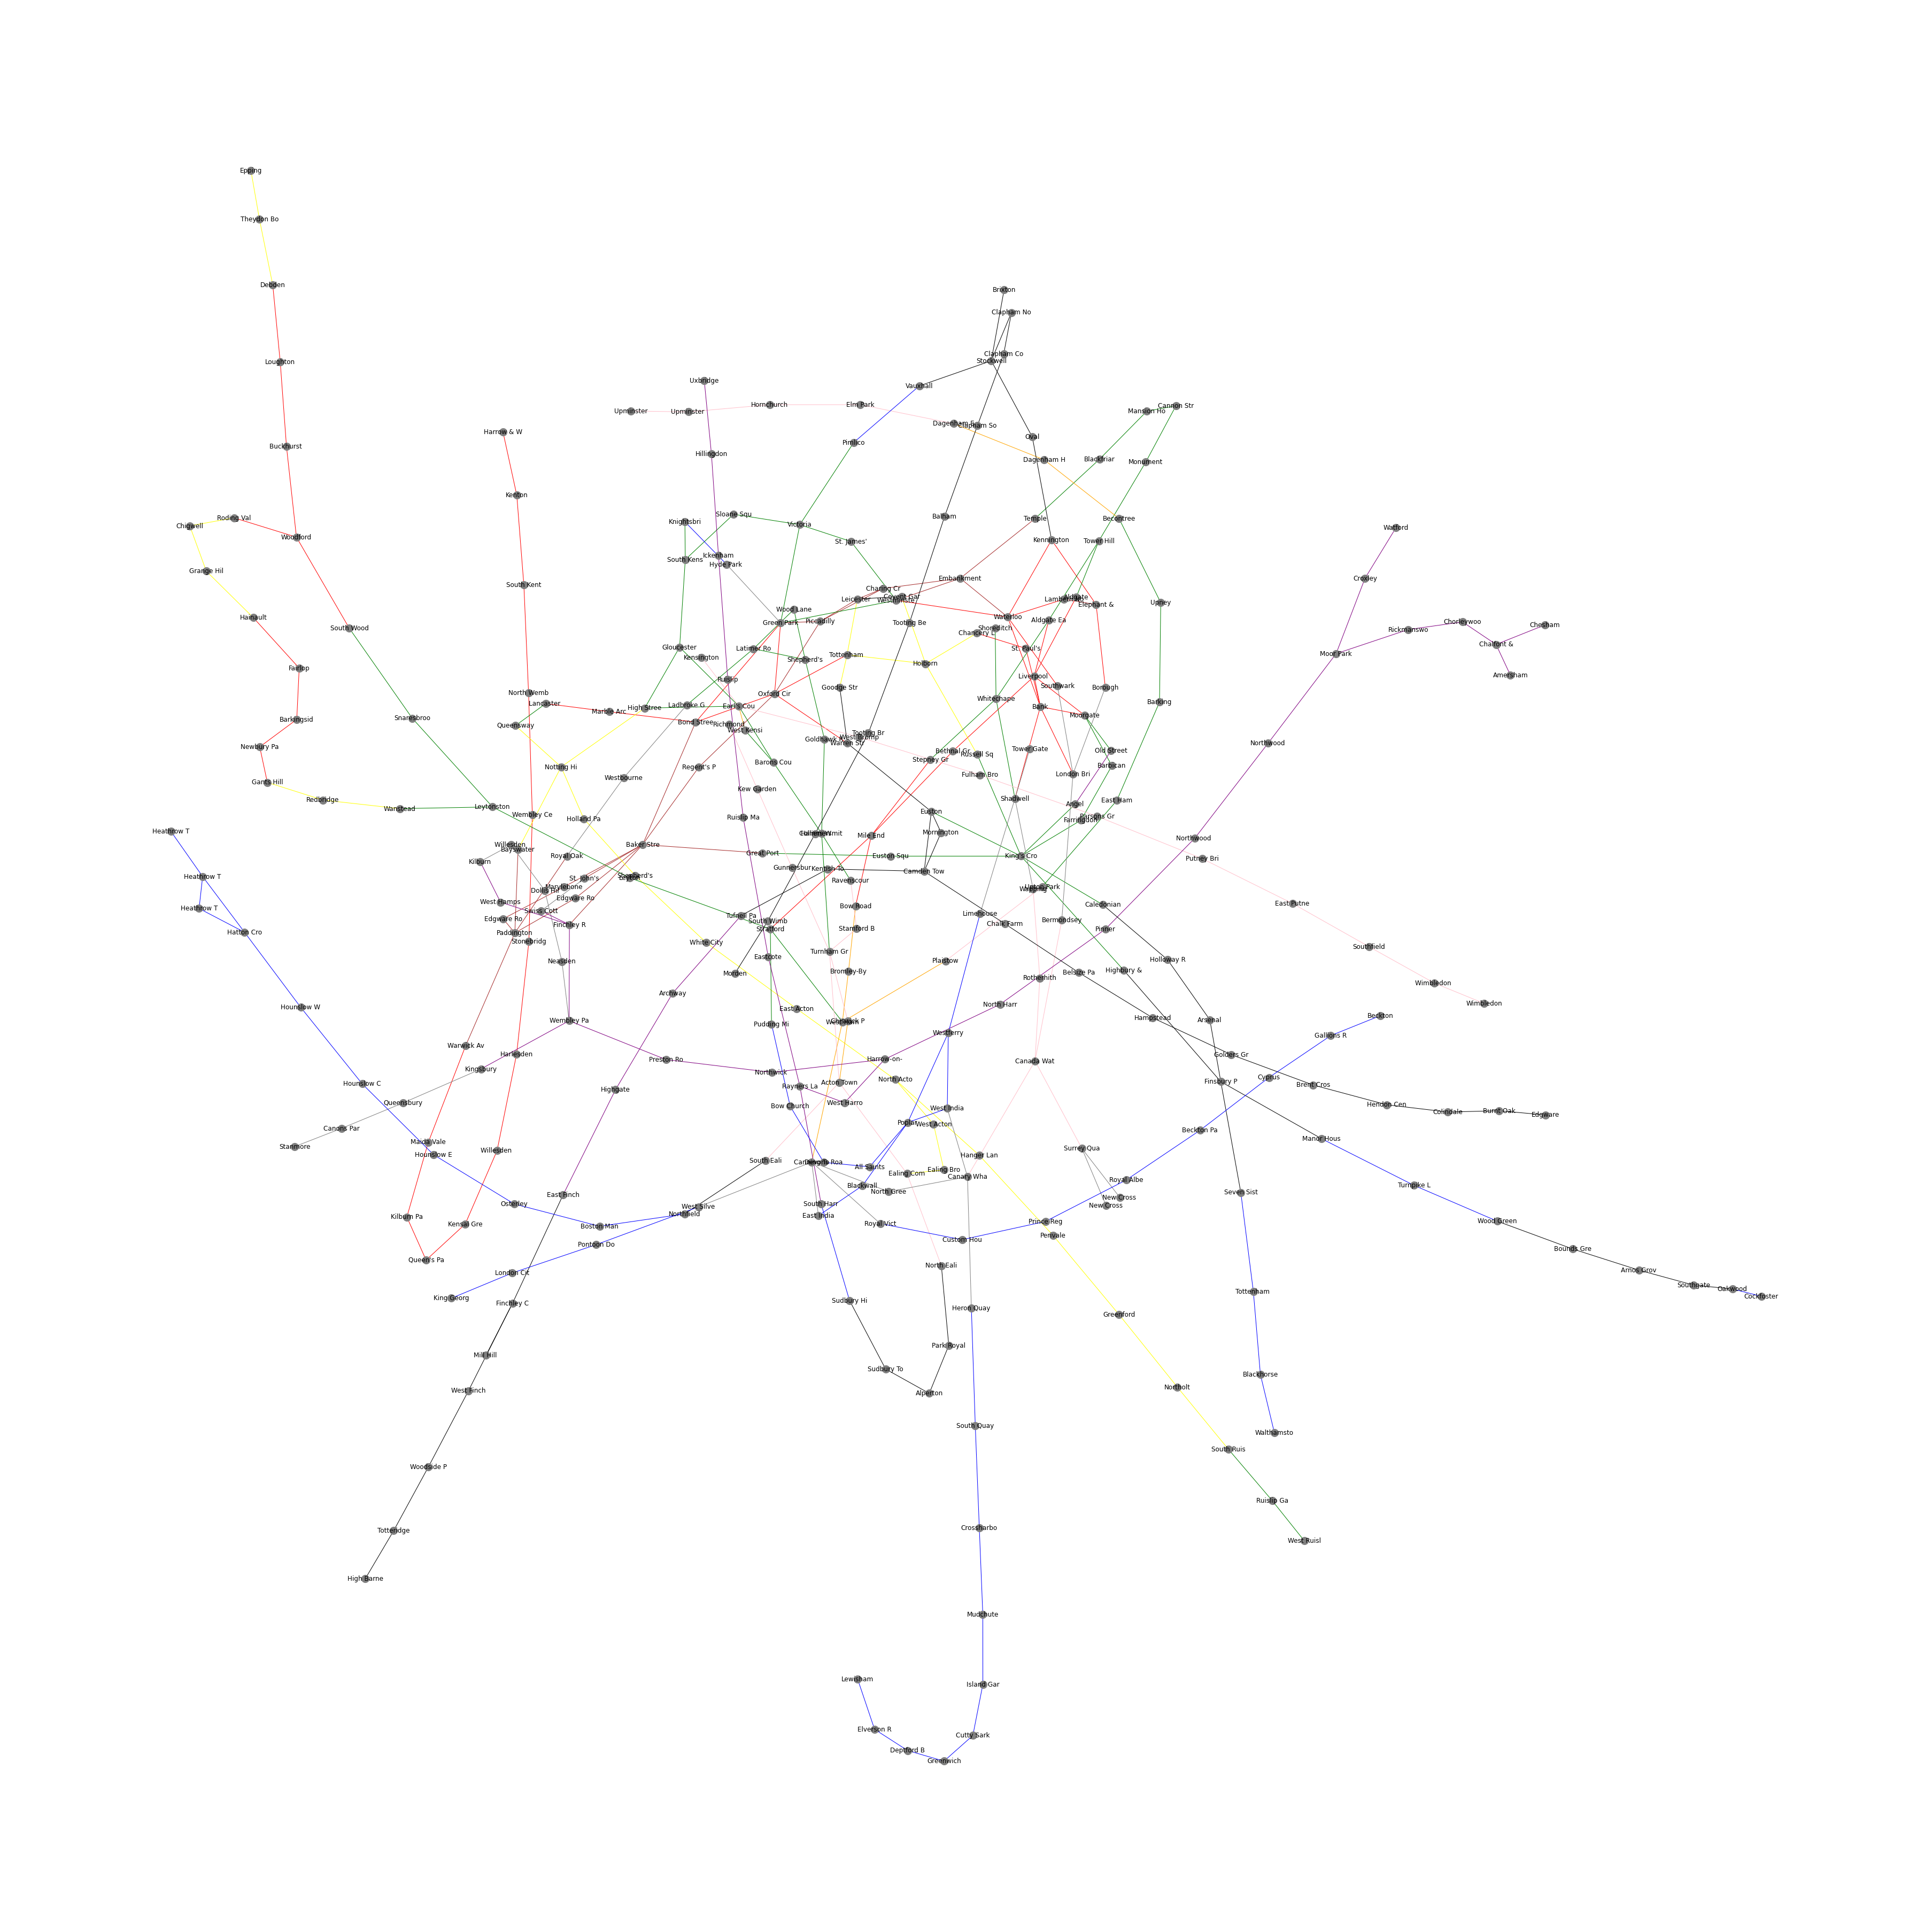

In [1261]:
options = {'node_color':'grey', 'node_size':200,'edge_color':colors, 'width':1, 'labels':labels, 'with_labels': True}
plt.figure(1, figsize = (50, 50))
nx.draw(LondonUndergroundRouteGraph, **options)

This graph shows the routes, stations and lines of London Underground. 

In [1262]:
centrality = nx.degree_centrality(LondonUndergroundRouteGraph)
print(centrality)

{'11': 0.02280130293159609, '163': 0.006514657980456026, '212': 0.006514657980456026, '49': 0.00977198697068404, '87': 0.013029315960912053, '197': 0.013029315960912053, '82': 0.006514657980456026, '193': 0.016286644951140065, '84': 0.00977198697068404, '148': 0.006514657980456026, '279': 0.01954397394136808, '113': 0.006514657980456026, '246': 0.006514657980456026, '298': 0.006514657980456026, '114': 0.003257328990228013, '140': 0.006514657980456026, '137': 0.006514657980456026, '206': 0.006514657980456026, '237': 0.006514657980456026, '143': 0.006514657980456026, '159': 0.006514657980456026, '278': 0.006514657980456026, '185': 0.006514657980456026, '281': 0.006514657980456026, '192': 0.01954397394136808, '13': 0.01954397394136808, '156': 0.016286644951140065, '250': 0.006514657980456026, '16': 0.006514657980456026, '91': 0.006514657980456026, '173': 0.006514657980456026, '24': 0.006514657980456026, '164': 0.013029315960912053, '28': 0.013029315960912053, '162': 0.006514657980456026, 

The dictionary shows the centralities which represent nubs in London Underground network. 

In [1263]:
orders = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
for i in orders:
    for f2 in LondonUndergroundStations:
        if int(i[0]) == int(f2.id_number):
            print(f2.name, i[1])

Baker Street 0.02280130293159609
King's Cross St. Pancras 0.02280130293159609
Waterloo 0.01954397394136808
Oxford Circus 0.01954397394136808
Bank 0.01954397394136808
Earl's Court 0.01954397394136808
Green Park 0.01954397394136808
Paddington 0.016286644951140065
Liverpool Street 0.016286644951140065
Turnham Green 0.016286644951140065
Shadwell 0.016286644951140065
Canning Town 0.016286644951140065
Embankment 0.013029315960912053
Piccadilly Circus 0.013029315960912053
Mile End 0.013029315960912053
Bond Street 0.013029315960912053
Holborn 0.013029315960912053
Tottenham Court Road 0.013029315960912053
Notting Hill Gate 0.013029315960912053
Stratford 0.013029315960912053
Moorgate 0.013029315960912053
Westminster 0.013029315960912053
Victoria 0.013029315960912053
Whitechapel 0.013029315960912053
Hammersmith 0.013029315960912053
West Ham 0.013029315960912053
Acton Town 0.013029315960912053
Canada Water 0.013029315960912053
London Bridge 0.013029315960912053
Canary Wharf 0.013029315960912053
Fi

In [1264]:
for f2 in LondonUndergroundStations:
    if int(orders[0][0]) == int(f2.id_number):
        print(f2.name +' ' + 'is the station with the highest centrality.')

Baker Street is the station with the highest centrality.


After analysis, we found that Baker Street may be the busiest station in London.

-----

In [1265]:
LondonUndergroundRouteGraph2 = nx.Graph()

In [1266]:
for f1 in LondonUndergroundRouteSubset:
    f1.station1rating = float('%.5f' %centrality[f1.station1])
    f1.station2rating = float('%.5f' %centrality[f1.station2])
    for f2 in LondonUndergroundStations:
        if f1.station1 == f2.id_number:
            f1.station1name = f2.name
            LondonUndergroundRouteGraph2.add_node(f1.station1, label = f1.station1name, size = int(5000 * f1.station1rating), color = '#b1d1fc')
        if f1.station2 == f2.id_number:
            f1.station2name = f2.name
            LondonUndergroundRouteGraph2.add_node(f1.station2, label = f1.station2name, size = int(5000 * f1.station2rating), color = '#b1d1fc')

In [1267]:
for f in LondonUndergroundRouteSubset:
    for g in LondonUndergroundLines:
        if f.line == g.line:
            LondonUndergroundRouteGraph2.add_edge(f.station1, f.station2, weight = 5, color = g.color)

In [1268]:
from pyvis.network import Network
nt = Network('1080px', '1920px')
nt.barnes_hut()
nt.from_nx(LondonUndergroundRouteGraph2)
nt.show_buttons(filter_=['physics'])
nt.show('nx.html')